# Dogs Vs Cats technical challenge

### By Millán Sánchez(As part of the technical interview process for the Regional Cloud Developer Advocate role at Microsoft).  msanchez@microsoft.com



The Dogs vs. Cats challenge is a computer vision problem that involves classifying photos as either containing a dog or cat. It is one of those challenges that every aspiring Machine Learning Engineer or DataScientist should understand deeply in order to move to more complex challenges. 

After completing this notebook, you will know:

1. Where to find a dataset of dogs and cats photos
2. Load and prepare photos of dogs and cats
3. How to develop a model for photo classification using Transfer Learning (pre-trained models)
4. How to develop a model for photo classification using Azure CustomVision.ai service




Although the problem sounds simple, it was only effectively addressed in the last few years using deep learning convolutional neural networks. 



Every notebook should start with the following lines to ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [0]:
# Put these at the top of every notebook, to get automatic reloading # and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 1. Where to find a dataset of dogs and cats photos

Microsoft Research in partnership with Petfinder.com created a few years ago a great dataset of dogs and cats, ready to be used with already classified photos. They've provided  with over three million images of cats and dogs, manually classified by people at thousands of animal shelters across the United States. https://www.microsoft.com/en-us/download/details.aspx?id=54765&WT.mc_id=rss_alldownloads_devresources

The complete dataset can be downloaded from the following URL:http://files.fast.ai/files/dogscats.zip




So lets proceed to download the dataset by using the wget command, that will download a ZIP file contaning all the dogs and cats images.  It will be an 850MB aprox download so it will take some time to finish

In [3]:
!wget -c http://files.fast.ai/files/dogscats.zip

--2019-09-09 23:48:52--  http://files.fast.ai/files/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 861515103 (822M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 821.60M  14.2MB/s    in 61s     

2019-09-09 23:49:54 (13.5 MB/s) - ‘dogscats.zip’ saved [861515103/861515103]



## 2. Load and prepare photos of dogs and cats

First of all lets Unzip the downloaded dataset. Please take into consideration that Unzipping the file will take some time.

In [4]:
!unzip dogscats.zip
!ls -la

Archive:  dogscats.zip
   creating: dogscats/
   creating: dogscats/test1/
  inflating: dogscats/test1/9292.jpg  
  inflating: dogscats/test1/12026.jpg  
  inflating: dogscats/test1/9688.jpg  
  inflating: dogscats/test1/4392.jpg  
  inflating: dogscats/test1/779.jpg  
  inflating: dogscats/test1/2768.jpg  
  inflating: dogscats/test1/2399.jpg  
  inflating: dogscats/test1/12225.jpg  
  inflating: dogscats/test1/10947.jpg  
  inflating: dogscats/test1/1780.jpg  
  inflating: dogscats/test1/11631.jpg  
  inflating: dogscats/test1/8478.jpg  
  inflating: dogscats/test1/7940.jpg  
  inflating: dogscats/test1/5102.jpg  
  inflating: dogscats/test1/1704.jpg  
  inflating: dogscats/test1/5967.jpg  
  inflating: dogscats/test1/1261.jpg  
  inflating: dogscats/test1/11882.jpg  
  inflating: dogscats/test1/3237.jpg  
  inflating: dogscats/test1/10222.jpg  
  inflating: dogscats/test1/10854.jpg  
  inflating: dogscats/test1/6810.jpg  
  inflating: dogscats/test1/8615.jpg  
  inflating: dogscats/

Lets plot some cat images from the training folder:

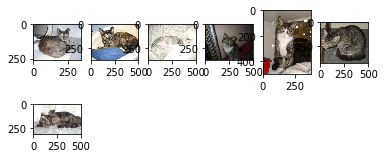

In [5]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dogscats/train/cats/'
# plot first few images
for i in range(30,37,1):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

Lets plot some dog images from the training folder:

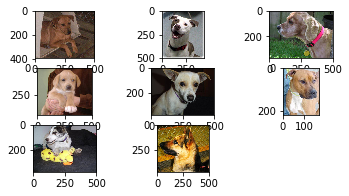

In [6]:

# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'dogscats/train/dogs/'
# plot first few images
for i in range(100,108,1):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# # 3. How to develop a model for photo classification using Transfer Learning (pre-trained models)

Deep convolutional neural network models may take days or even weeks to train on very large datasets(As the DogCats Dataset we are using here).

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. This is called Tranfer Learning. Transfer learning, is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

This Dog Vs Cats classification task will make use of pre-trained model, available in the great FAST.AI library. A pre-trained model is one which has been trained on similar type of data by someone else. So instead of training the model from scratch, a model will be used that has been trained on ImageNet. ImageNet is a dataset consisting of 1.2 million images and 1000 classes.  This pre-trained model will be the basis of the solution.  We will use a pre-trained model called RESNET50.  ResNet is the Convolutional Neural Network that a Microsoft team used to win the ILSRVC 2015 competition and surpass the human performance on ImageNet dataset. ResNet50 is one of the versions provided in those experiments, and has proven to be an excellent model to do image classification.  Basically what we are going 

For more info, you can read their paper in https://arxiv.org/abs/1512.03385 Deep Residual Learning for Image Recognition

We set the path to the Training folder and specify two important parameters: Batch size and image size.  The bigger the batch size the faster we will train our model, but more memory is required.  The image size specifies the resizing/shrinking required for all images.

In [7]:
from fastai.vision import *
from fastai.metrics import error_rate


PATH="dogscats/train"
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size

data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )



There are 18400 training images and 4600 validation images.


Lets show some of the images and their corresponding label:

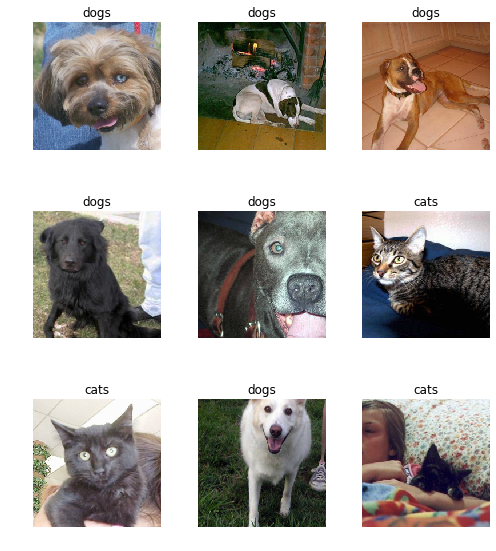

In [8]:
data.show_batch(rows=3, figsize=(7,8)) #show 3 lines of images, totaling 9 random images from the training set

In the following line we are specifying that we will use the ResNet50 model. So we will have a new model based on ResNet50, having as input the images of cats and dogs found in the training folder.  This will take some minutes to finish, so be patient.

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy) #create a Convolutional Neural Network based on the RestNet50 model.  Do Transfer Learning with the Dogs and Cats images.
learn.fit_one_cycle(4) # execute 4 epochs, that is basicallly 4 complete iterations with all the Data.

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 157459351.61it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.064533,0.033054,0.989565,03:50
1,0.046853,0.023222,0.993043,03:49
2,0.034892,0.017410,0.993478,03:49
3,0.027454,0.018524,0.993261,03:50


### Analyzing results

Lets see the performance of this model by showing the confusion matrix. This matrix is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa)

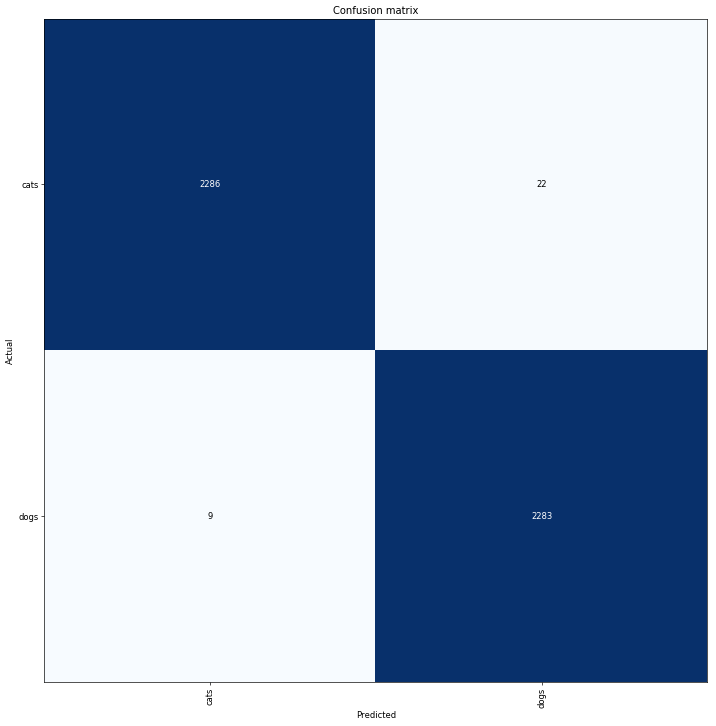

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

As you can see we have a great model to identify Dogs and Cats!!.  More than 98% accuracy.

The confusion matrix shows that some of the images in the validation set are not correctly classified.  Lets see some of those images not correctly classified:

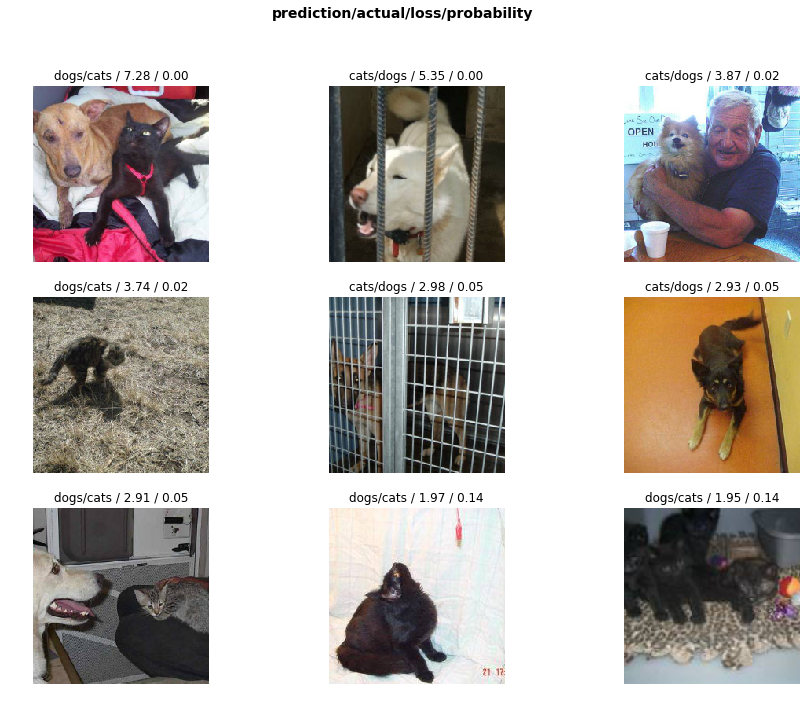

In [11]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

Some odd images!!  That is the reason the model is not able to correctly classify the dogs or cats. 

If we want to predict the label or prediction of a totally new image we can do it by specifying the path to a new image

It is a cats


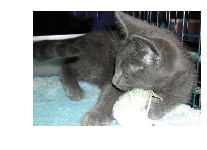

In [12]:
imagepath = '/content/dogscats/test1/100.jpg' #The path to your test image
img = open_image(imagepath) #load the image
pred_class,pred_idx,outputs = learn.predict(img) #predict the label for the specified image
img.show()
print ("It is a", pred_class)


## 4. How to develop a model for photo classification using Azure CustomVision.ai service

Azure Custom Vision is a cognitive service that lets you build, deploy, and improve your own image classifiers. An image classifier is an AI service that applies labels (which represent classes) to images, according to their visual characteristics. In this service we upload the images to the service, specify the label of the images, and the services create a Machine Learning model (based on Transfer Learning) to classify new images based on the characteristics of the image, and sets a label and probability to each image based on the labels used during the uploading process.

In order to use the service we have to sign up for an Azure account and also sign up in the site: http://www.customvision.ai

Once you have the Azure account and access to the CustomVision.ai portal, start the exercice by creating a NEW PROJECT.


![](https://drive.google.com/uc?export=view&id=17LijjL2HUZ6c7eKBG4EjDtanByd7vGIQ)




After creating the new project a new screen will appear.  Fill the name, descripion, and all Resources in the Azure Subscription.  Project type is classification, Multiclass (single tag per image), and domain is General.


![](https://drive.google.com/uc?export=view&id=1DhqlU8G42zkDdCQ3L33dKdCmeUSQfd4F)




Then proceed to upload a big set of Dogs Images, and add the DOG label after uploading. Then upload Cat Images and add the CAT label after uploading. Use the dogscats dataset downloaded in the first part of this exercice:

![](https://drive.google.com/uc?export=view&id=1sVd1XYRYq3Xgl7QcwM2cmO_sVooJSJ49)


The next step after uploading and labeling the images, is to TRAIN the model.  Click on the green "Train" button

![](https://drive.google.com/uc?export=view&id=1Oe-K9_OKsEXKRriK9Jc2BixagHlaKqUQ)


Proceed with a Fast Training.

![](https://drive.google.com/uc?export=view&id=1qwYtsdS_2hCXKsMIBx_kKDvHq0WQZiFD)


and that's it.  We have a trained and ready to use Dog Vs Cat classification model.

Lets just see how good our model is:

![](https://drive.google.com/uc?export=view&id=10E2Xkz2BkSZ9xIghB1HHGuE9d5vGKygm)


Pretty good performance, close to 100%.  

In order to use the model in our own applications, we have to use some Keys and values found in the Prediction URL and Settings Page.

![](https://drive.google.com/uc?export=view&id=1ORqQ7nzp5MUXZSArgP29L7y_jgxKlHZJ)


From the Prediction URL page, write down the Prediction Key for an Image File

![](https://drive.google.com/uc?export=view&id=1eRP0tryzCz0v7i0SuDcKcbpa1JosiVtC)


And from the settings page, write down the EndPoint,Resource Id and Project Id :

---




![](https://drive.google.com/uc?export=view&id=1yBsUKLCBQ4mLArgHEeheLDwmLpzR-AeI)


After that we are ready to use our mode.  We have to import the CustomVision SDK and specify the EndPoint, Prediction Key and Resource ID

In [13]:
!pip install azure-cognitiveservices-vision-customvision
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry

ENDPOINT = "https://eastus.api.cognitive.microsoft.com/"

# Replace with a valid key
prediction_key = "05c32712a6664b9ba61d3285cba788e9"
prediction_resource_id = "/subscriptions/a8fcc080-6ca7-4a6a-8a4a-65d1c0e264d6/resourceGroups/ISAtest/providers/Microsoft.CognitiveServices/accounts/ISAtest"

     |████████████████████████████████| 112kB 33.2MB/s 
     |████████████████████████████████| 92kB 34.6MB/s 
     |████████████████████████████████| 51kB 31.9MB/s 


And then we can call the CustomVision.ai model by creating a Predictor and establishing the image file we want to analize:

	Cat: 100.00%
	Dog: 0.00%


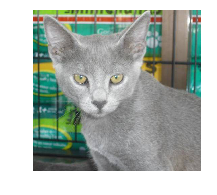

In [14]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

# Now there is a trained endpoint that can be used to make a prediction
predictor = CustomVisionPredictionClient(prediction_key, endpoint=ENDPOINT)

with open("/content/dogscats/valid/cats/cat.1013.jpg", "rb") as image_contents: #this is the Path to the image we want to predict the label for.
    results = predictor.classify_image("ee4d3fbc-8c69-4f7f-b587-034dad5cf4eb", "Iteration1", image_contents.read()) # here put the name of you Iteration in CustomVision.ai service and the Project ID

    # Display the results.
    for prediction in results.predictions:
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))
img = open_image("/content/dogscats/valid/cats/cat.1013.jpg") #load the image and present it.
img.show()

As you can see the model has predicted that the image is from a Cat.  CORRECT!!!, with 100% probability.

Lets try with a dog image:

	Dog: 100.00%
	Cat: 0.00%


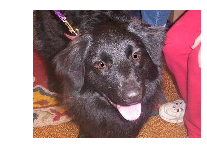

In [15]:
with open("/content/dogscats/valid/dogs/dog.10020.jpg", "rb") as image_contents: #this is the Path to the image we want to predict the label for.
    results = predictor.classify_image("ee4d3fbc-8c69-4f7f-b587-034dad5cf4eb", "Iteration1", image_contents.read())# here put the name of you Iteration in CustomVision.ai service and the Project ID

    # Display the results.
    for prediction in results.predictions:
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))
img = open_image("/content/dogscats/valid/dogs/dog.10020.jpg") #load the image and present it.
img.show()

Correctly classified!!!

Pretty easy to use the CustomVision.ai model, with just a few lines of code.  Performance is really good with the out of the box parameters in the Service Portal.  

Hope this notebooks explains how to do basic image classification.  Thanks.